In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cPickle as pickle

# Assignment 2 Multi-agent Learning Seminar

In [2]:

numtrials=5
numep = 3000
alpha =0.1
eps = 0.05
lambda_ = 0.5

#store data in 3d array
steps = np.zeros((numep,numtrials))
rewards = np.zeros((numep,numtrials))

datadir = "/home/youri/Logs/sarsa/"

for t in range(1,numtrials+1):
    with open(datadir+'SARSA_log.'+str(t),'rb') as f:
        print 'Opened file: ' + 'SARSA_log.'+str(t)
        log = pickle.load(f)
        steps[:,t-1] = np.array(log['steps'])
        rewards[:,t-1] = np.array(log['reward'])
        

Opened file: SARSA_log.1
Opened file: SARSA_log.2
Opened file: SARSA_log.3
Opened file: SARSA_log.4
Opened file: SARSA_log.5


Calculate basic statistics of number of steps over different trials

In [3]:
from scipy import stats
mean_rew = np.mean(rewards,axis=1) #average reward
err_rew =stats.sem(rewards,axis=1) #standard error of mean

mean_steps = np.mean(steps,axis=1) #average reward
err_steps =stats.sem(steps,axis=1) #standard error of mean

#statistics for first 50 episodes
mean_rew_50 = np.mean(rewards[:50,:],axis=1)
err_rew_50 = stats.sem(rewards[:50,:],axis=1) #standard error of mean

mean_step_50 = np.mean(rewards[:50,:],axis=1)
err_step_50 = stats.sem(rewards[:50,:],axis=1) #standard error of mean

Plot learning curves with 95% confidence (t_dist standard error Note: this assumes normal distribution of means, probably not true here)

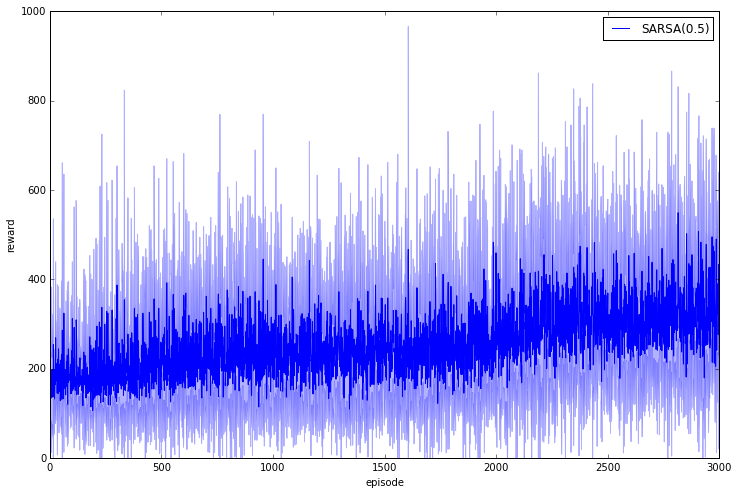

In [4]:
plt.figure(figsize=(12,8))

confidence = 0.95
#factor for given confidence and number of trials
t= stats.t._ppf((1+confidence)/2., numtrials-1)

colors=['blue','green','red']

plt.plot(mean_rew, label='SARSA(0.5)')
plt.fill_between(np.arange(numep),(mean_rew-t*err_rew),(mean_rew+t*err_rew),alpha=0.3,color='blue')

plt.xlabel('episode')
plt.ylabel('reward')
plt.ylim((0,1000))
plt.legend()

/home/youri/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


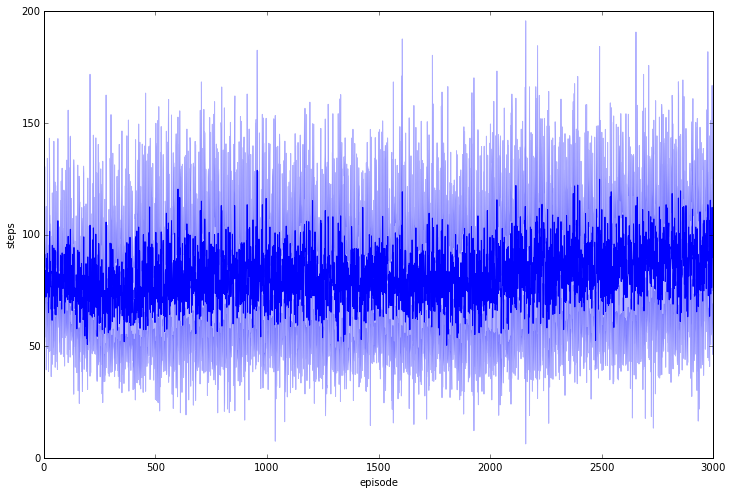

In [5]:
plt.figure(figsize=(12,8))

confidence = 0.95
#factor for given confidence and number of trials
t= stats.t._ppf((1+confidence)/2., numtrials-1)

colors=['blue','green','red']

plt.plot(mean_steps)
plt.fill_between(np.arange(numep),(mean_steps-t*err_steps),(mean_steps+t*err_steps),alpha=0.3,color='blue')

plt.xlabel('episode')
plt.ylabel('steps')
plt.ylim((0,200))
plt.legend()

We can smooth the curves by taking a running average or applying a filter

In [6]:
from scipy.signal import gaussian
from scipy.ndimage import filters

#gaussian filter (running average but closer points have higher weights)
def smoothing(x,window,axis=0):
    filt = gaussian(window,2.)
    return filters.convolve1d(x,filt/np.sum(filt),axis)

#standard running average
def running_average(x,window,axis=0):
    return filters.convolve1d(x,np.ones(window),axis)

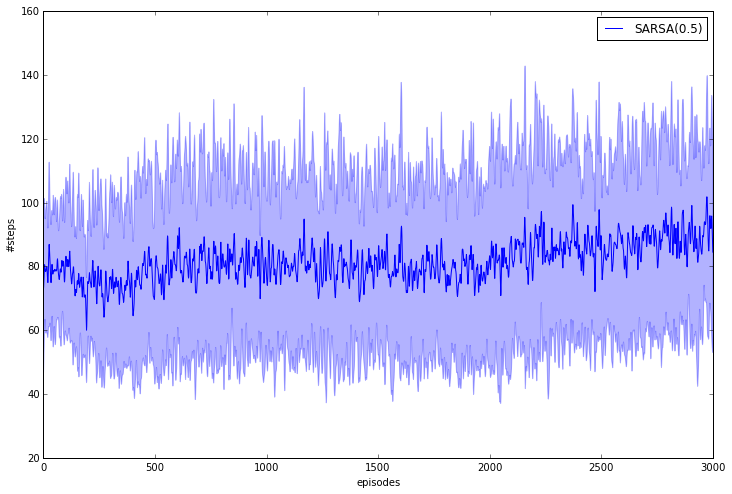

In [7]:
mean_sm = smoothing(mean_steps,100,0)
err_sm = smoothing(err_steps,100,0)

plt.figure(figsize=(12,8))
plt.plot(mean_sm,label='SARSA(0.5)')
plt.fill_between(np.arange(numep),(mean_sm-t*err_sm),(mean_sm+t*err_sm),alpha=0.3,color='blue')

plt.ylabel('#steps')
plt.xlabel('episodes')

plt.legend()

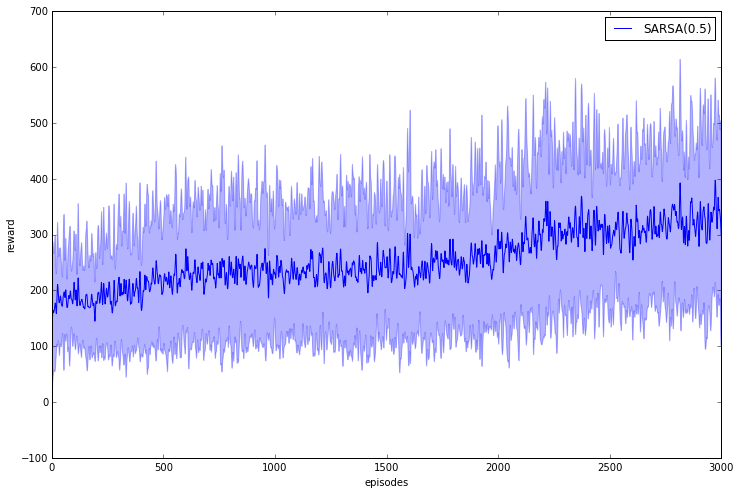

In [8]:
mean_sm_rew = smoothing(mean_rew,100,0)
err_sm_rew = smoothing(err_rew,100,0)

plt.figure(figsize=(12,8))
plt.plot(mean_sm_rew,label='SARSA(0.5)')
plt.fill_between(np.arange(numep),(mean_sm_rew-t*err_sm_rew),(mean_sm_rew+t*err_sm_rew),alpha=0.3,color='blue')

plt.ylabel('reward')
plt.xlabel('episodes')

plt.legend()